=t 4f![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/02_Decision%20Tree.%20A%20Supervised%20Classification%20Model/02_decision-tree_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 02 | Decision Tree. A Supervised Classification Model

## Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd

df_internet = pd.read_excel('../data/internet_usage_spain.xlsx', sheet_name=1)
df_internet

,name,internet_usage,sex,age,education
0,Josefina,0,Female,66,Elementary
1,Vicki,1,Male,72,Elementary
2,David,1,Male,48,University
3,Curtis,0,Male,59,PhD
4,Josephine,1,Female,44,PhD
...,...,...,...,...,...
2450,Frances,1,Male,43,Elementary
2451,Harry,1,Female,18,High School
2452,Adam,0,Female,54,Elementary
2453,Christine,1,Male,31,High School


## Data Preprocessing

1. The Python function to fit the model cannot process information as a string. Therefore, you need to convert **categorical variables to dummy variables**.
2. You need to check for **missing data** and drop it in case there are.

In [2]:
df_internet.isna().sum()

name              0
internet_usage    0
sex               0
age               0
education         0
dtype: int64

In [3]:
df_internet= pd.get_dummies(data=df_internet)
df_internet

,internet_usage,age,name_Ada,name_Adam,name_Adrianne,name_Aida,name_Alaina,name_Alan,name_Alanna,name_Albert,...,name_Zachary,name_Zelma,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,72,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,48,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,59,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,44,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,1,43,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2451,1,18,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2452,0,54,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2453,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## `DecisionTreeClassifier()` Model in Python

In [4]:
df =pd.get_dummies(data=df_internet,drop_first=True)
df_internet = df
df_internet


,internet_usage,age,name_Ada,name_Adam,name_Adrianne,name_Aida,name_Alaina,name_Alan,name_Alanna,name_Albert,...,name_Zachary,name_Zelma,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,72,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,48,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,59,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,44,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,1,43,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2451,1,18,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2452,0,54,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2453,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
from sklearn.tree import DecisionTreeClassifier

### instantiante the Class

In [6]:
model_dt = DecisionTreeClassifier()

In [7]:
features =df.drop(columns='internet_usage')
target = df[['internet_usage']]

### Fit the Model

In [8]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier()

In [9]:
df_internet

,internet_usage,age,name_Ada,name_Adam,name_Adrianne,name_Aida,name_Alaina,name_Alan,name_Alanna,name_Albert,...,name_Zachary,name_Zelma,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,72,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,48,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,59,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,44,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,1,43,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2451,1,18,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2452,0,54,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2453,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Calculate Predictions

In [10]:
model_dt.predict(X=features)

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

### Create a New DataFrame for the Predictions

In [11]:
df_internet['predict']= model_dt.predict(X=features)
df_internet

,internet_usage,age,name_Ada,name_Adam,name_Adrianne,name_Aida,name_Alaina,name_Alan,name_Alanna,name_Albert,...,name_Zelma,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University,predict
0,0,66,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,1,72,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,1,48,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,0,59,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,44,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,1,43,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2451,1,18,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2452,0,54,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2453,1,31,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Visualize the Model

In [12]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'age <= 48.5\ngini = 0.497\nsamples = 2455\nvalue = [1140, 1315]'),
 Text(0.25, 0.5, 'education_Elementary <= 0.5\ngini = 0.344\nsamples = 1412\nvalue = [312, 1100]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.176\nsamples = 849\nvalue = [83, 766]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 563\nvalue = [229, 334]'),
 Text(0.75, 0.5, 'education_PhD <= 0.5\ngini = 0.327\nsamples = 1043\nvalue = [828, 215]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.285\nsamples = 987\nvalue = [817, 170]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.316\nsamples = 56\nvalue = [11, 45]')]

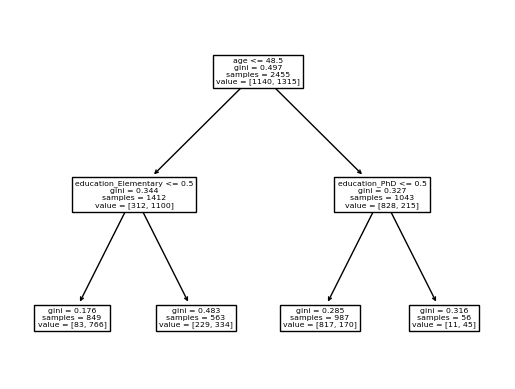

In [13]:
model_dt =DecisionTreeClassifier(max_depth=2)
model_dt.fit(X=features, y=target)
plot_tree(decision_tree=model_dt,feature_names=features.columns)

In [14]:
import matplotlib.pyplot as plt

[Text(0.5, 0.8333333333333334, 'age <= 48.5\ngini = 0.497\nsamples = 2455\nvalue = [1140, 1315]'),
 Text(0.25, 0.5, 'education_Elementary <= 0.5\ngini = 0.344\nsamples = 1412\nvalue = [312, 1100]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.176\nsamples = 849\nvalue = [83, 766]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 563\nvalue = [229, 334]'),
 Text(0.75, 0.5, 'education_PhD <= 0.5\ngini = 0.327\nsamples = 1043\nvalue = [828, 215]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.285\nsamples = 987\nvalue = [817, 170]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.316\nsamples = 56\nvalue = [11, 45]')]

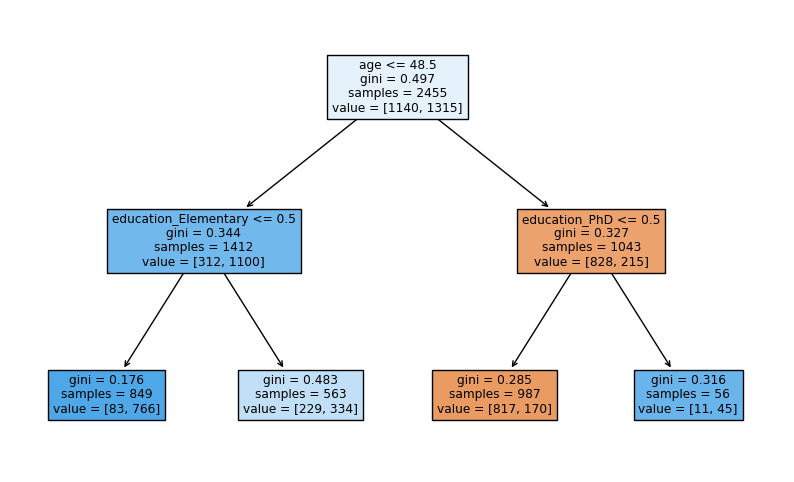

In [15]:
plt.figure(figsize= (10 , 6))
plot_tree(decision_tree=model_dt,feature_names=features.columns ,filled=True)

### Model Interpretation

In [16]:
features[:1]

,age,name_Ada,name_Adam,name_Adrianne,name_Aida,name_Alaina,name_Alan,name_Alanna,name_Albert,name_Albertine,...,name_Zachary,name_Zelma,sex_Female,sex_Male,education_Elementary,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


## condition 1 = <= 48 but the age =66 which is false  we move down to the right side of the tree
## condition 2 =education phd<=0.5  but  the phd=0 which is true we move down to the left 

## the sample tells us 987 without phd  and 170 use internert  to the probability 170/987


In [17]:
170/987

0.17223910840932116

In [18]:
model_dt.predict_proba(X=features)[:1]

array([[0.82776089, 0.17223911]])

### Model's Score

In [19]:
model_dt.score(X=features,y=target)

0.7991853360488799

#### The Score Step-by-step and create a new data frame with prediction

In [20]:
model_dt.predict_proba(X=features)

array([[0.82776089, 0.17223911],
       [0.82776089, 0.17223911],
       [0.09776207, 0.90223793],
       ...,
       [0.82776089, 0.17223911],
       [0.09776207, 0.90223793],
       [0.82776089, 0.17223911]])

In [21]:
df_usage=df_internet[['internet_usage']].copy(True)

In [22]:
df_usage['prediction'] =model_dt.predict(X= features)

In [23]:
df_usage['prediction_prob']=model_dt.predict_proba(X=features)[:,1]
df_usage

,internet_usage,prediction,prediction_prob
0,0,0,0.172239
1,1,0,0.172239
2,1,1,0.902238
3,0,1,0.803571
4,1,1,0.902238
...,...,...,...
2450,1,1,0.593250
2451,1,1,0.902238
2452,0,0,0.172239
2453,1,1,0.902238


In [24]:
df_usage

,internet_usage,prediction,prediction_prob
0,0,0,0.172239
1,1,0,0.172239
2,1,1,0.902238
3,0,1,0.803571
4,1,1,0.902238
...,...,...,...
2450,1,1,0.593250
2451,1,1,0.902238
2452,0,0,0.172239
2453,1,1,0.902238


In [25]:
import numpy as np


In [26]:
df_usage.prediction_prob > 0.5

0       False
1       False
2        True
3        True
4        True
        ...  
2450     True
2451     True
2452    False
2453     True
2454    False
Name: prediction_prob, Length: 2455, dtype: bool

In [27]:
df_usage.internet_usage ==df_usage.prediction

0        True
1       False
2        True
3       False
4        True
        ...  
2450     True
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

In [28]:
cmp = df_usage.internet_usage ==df_usage.prediction

In [29]:
cmp.sum()

1962

In [30]:
cmp.sum()/len(cmp)

0.7991853360488799

In [31]:
cmp.mean()

0.7991853360488799

## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [33]:
confusion_matrix(y_true=df_usage.internet_usage, y_pred=df_usage.prediction)

array([[ 817,  323],
       [ 170, 1145]], dtype=int64)

In [34]:
matrix=confusion_matrix(y_true=df_usage.internet_usage, y_pred=df_usage.prediction)

In [35]:
matrix = ConfusionMatrixDisplay(matrix)

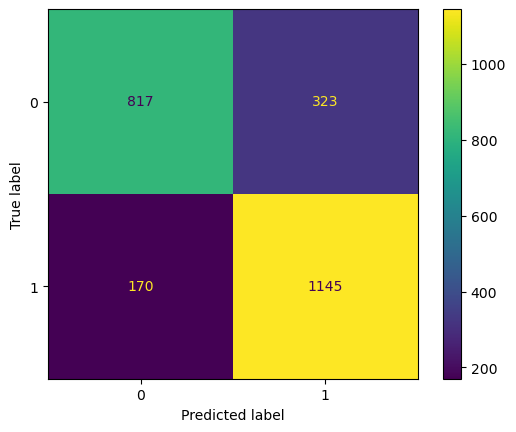

In [36]:
matrix.plot()

### Sensitivity (Recall=1)

### model  predict 170 do not use internet
### model predict 1145 use internrt


In [37]:
1145/(1145+170)

0.870722433460076

### Specificity (Recall=0)

#### compute the negative class
#### look at the confusion matrics in rows


### how many dont use internet =817
### the model predict 323 use internet

In [38]:
817/(817+323)

0.7166666666666667

### Classification Report

In [39]:
from sklearn.metrics import classification_report

In [40]:
classification_report(y_true=df_internet.internet_usage, y_pred=df_usage.prediction)

'              precision    recall  f1-score   support\n\n           0       0.83      0.72      0.77      1140\n           1       0.78      0.87      0.82      1315\n\n    accuracy                           0.80      2455\n   macro avg       0.80      0.79      0.80      2455\nweighted avg       0.80      0.80      0.80      2455\n'

In [41]:
report =classification_report(y_true=df_internet.internet_usage, y_pred=df_usage.prediction)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1140
           1       0.78      0.87      0.82      1315

    accuracy                           0.80      2455
   macro avg       0.80      0.79      0.80      2455
weighted avg       0.80      0.80      0.80      2455



### ROC Curve

In [43]:
from sklearn.metrics import RocCurveDisplay

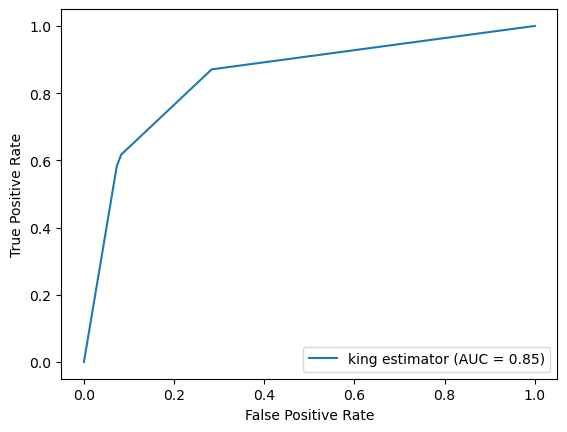

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y= df_usage.internet_usage
predict= model_dt.predict_proba(X=features)[:,1]
fpr,tpr, thresholds = metrics.roc_curve(y,predict)
roc_auc = metrics.auc(fpr,  tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name="king estimator")
display.plot()
plt.show()

## `RandomForestClassifier()` in Python

 ### import randomforestclassifier from sklearn

In [45]:
from sklearn.ensemble import RandomForestClassifier

#### Instantiante the Class

In [46]:
model_lr = RandomForestClassifier()

### Fit the Model

In [47]:
model_lr.fit(X=features ,y=target)

C:\Users\USER\AppData\Local\Temp\ipykernel_9380\283503027.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_lr.fit(X=features ,y=target)


RandomForestClassifier()

### Calculate Predictions

In [48]:
model_lr.predict(X=features)

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [49]:
model_lr.score(X=features ,y=target)

0.9979633401221996

## `SVC()` in Python

#### from sklearn svc

In [50]:
from sklearn.svm import SVC

### Instantiante the Class

In [51]:
model_svc = SVC()

### Fit the Model

In [52]:
model_svc.fit(X= features, y= target)

C:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Calculate Predictions

In [53]:
model_svc.predict(X= features)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Model's Score

In [54]:
model_svc.score(X=features ,y=target)

0.7938900203665987

## Which One Is the Best Model? Why?

### RandomForestClassifier
 #### FROM THE MODEL SCORE

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ X] Understand how **the Decision Tree Algorithm** is just counting observations to determine the outcome.
- [X ] Another way to **compare real data with predictions** from the model.
- [X ] Not all model visualizations are equal.
    - A tree was visualized instead of an `scatterplot()` to interpret the model.
- [ X] Distinguish **probability's role** to optimize this type of models.
- [ X] Know how to determine **why a variable is important** in the model.
    - Why is it giving significant differences?
    - How does EDA helps us to see it?
- [ X] Understand the process of the algorithm to determine if we need to **normalize/scale** the data.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.